In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:

df = pd.read_csv("Generation_data.csv")


X = df[[
    'MODULE_TEMP',
    'Amb_Temp',
    'WIND_Speed',
    'IRR (W/m2)',
    'DC Current in Amps',
    'AC Ir in Amps',
    'AC Iy in Amps',
    'AC Ib in Amps'
]]


y = df['AC Power in Watts']

X = X.fillna(0)
y = y.fillna(0)

In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Total features in X_train: {X_train.shape[1]}")

Total features in X_train: 8


In [ ]:

n_features = X_train.shape[1]


model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(n_features,)))


model.add(Dense(16, activation='relu'))

model.add(Dense(1))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(optimizer='adam', loss='mean_squared_error')


print("Starting model training...")
history = model.fit(
    X_train,
    y_train,
    epochs=35,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)
print("Training complete.")

Starting model training...
Epoch 1/35
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 22682619904.0000 - val_loss: 9735155712.0000
Epoch 2/35
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5850958336.0000 - val_loss: 1575814656.0000
Epoch 3/35
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1349268864.0000 - val_loss: 718124352.0000
Epoch 4/35
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 552478656.0000 - val_loss: 165919696.0000
Epoch 5/35
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 103159096.0000 - val_loss: 16044667.0000
Epoch 6/35
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 13020570.0000 - val_loss: 9108600.0000
Epoch 7/35
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8629339.0000 - val_loss: 7694231.5000
Epoch 8/35
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 7526463.0000 - val_loss: 7245487.5000
Epoch 9/35
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 7209822.0000 - val_loss: 7050826.0000
Epoch 10/35
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 6s

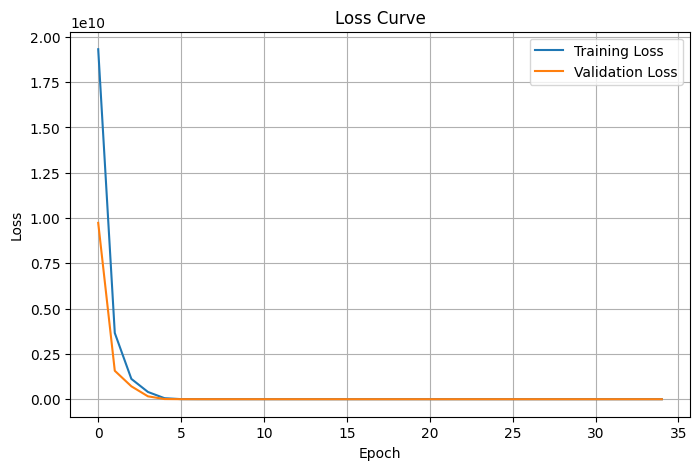

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')

if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
        Actual Power (y_test)  Predicted Power (model.predict)
16002                159962.0                    161149.562500
47439                 46801.0                     46788.714844
110913               280607.0                    282793.500000
72608                196581.0                    198842.921875
9981                  74216.0                     73808.500000
22162                288474.0                    285502.593750
61959                 21279.0                     20771.898438
50482                120745.0                    121315.250000
64103                265253.0                    266108.687500
42382                134000.0                    135103.218750


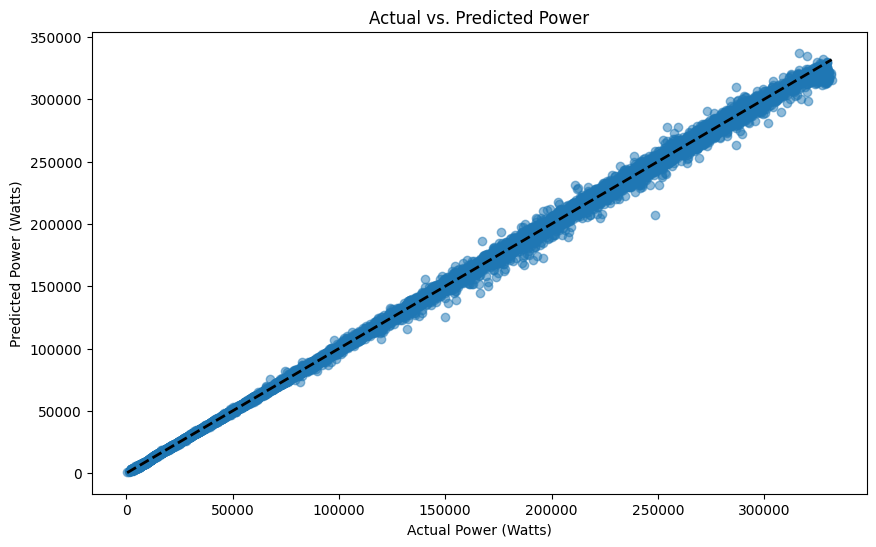

In [ ]:

predicted_values = model.predict(X_test)

results = pd.DataFrame({
    'Actual Power (y_test)': y_test,
    'Predicted Power (model.predict)': predicted_values.flatten()
})


print(results.head(10))


plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_values, alpha=0.5)
plt.xlabel("Actual Power (Watts)")
plt.ylabel("Predicted Power (Watts)")
plt.title("Actual vs. Predicted Power")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"MAE  : {mae}")
print(f"MSE  : {mse}")
print(f"RMSE : {rmse}")
print(f"R² Score (Accuracy-like): {r2}")


701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step
Model Evaluation Metrics:
MAE  : 1485.641025144764
MSE  : 6112171.660473273
RMSE : 2472.28065972965
R² Score (Accuracy-like): 0.9992587421575647
